# Домашняя работа # 2

Всего баллов: 12 баллов (идет в ведомость максимум 11).

За неаккуратное оформление работа штрафуется максимум на 1 балл с шагом 0.25 балла (нерабочий код, неудаленные черновики и т.д.).

Импортируем библиотеки.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Будем работать с [данными](https://www.ssa.gov/oact/babynames/limits.html) о самых популярных именах детей, родившихся в США в 1880-2020 годах.

Пример файла и легенда:

In [3]:
example = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/babies%20names/yob1880.txt',
                      names = ['name', 'sex', 'number'])
example.head()

,name,sex,number
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


Данные:

* `name` - имя
* `sex` - пол (мужское или женское)
* `number` - количество детей с таким именем

Файл из примера содержит данные за 1880 год. Т.е. последняя строчка в примере читается так:
"В 1880-м году 1746 девочек назвали Minnie"


## Задание 1 (2 балла)

**🔥 Если у вас не получилось сделать это задание, то в следующем задании можно загрузить готовый файл.**

**🔥🔥 Данное задание засчитывается полностью, если реализован предложенный алгоритм. Другие решения могут быть засчитаны частично.**

По [ссылке](https://github.com/rogovich/2022_POL_Data_Analysis_in_Python/blob/main/%40HW/HW2/names.zip) скачайте архив с файлами для каждого года наблюдений (1880-2020). Распакуйте файлы в папку `data`. Это не нужно делать с помощью Pyhton!

Положите этот блокнот в папку вместе с данными. В вашей папке должен быть блокнот и папка `data` с распакованным архивом.

В первую очередь нам нужно собрать все файлы в один датасет.

* Импортируйте библиотеку `os` — это библиотека для работы с операционной системой. С ее помощью мы сможем получить список названий всех 140 файлов.
* создайте [пустой датафрейм pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) `babies` со следующими колонками: `'name', 'sex', 'number', 'year'`
* Если вы все сделали правильно с распаковкой файлов, то `sorted(os.listdir('data'))` даст вам список всех файлов в папке `data`, отсортированный от самого раннего года к самому позднему.
* Запустите цикл `for` по `sorted(os.listdir('data'))` — на каждой итерации во временну переменную будет сохраняться название файла. Для каждого названия файла сделайте следующее:

    * Проверьте, что в название файла входит строка `'yob'` (так мы защитимся от возможных ошибок, если в папке будут какие-то посторонние файлы, например, временные)
    * С помощью среза извлеките из названия файла год, превратите в целое число и сохраните в переменную `year`.
    * С помощью функции `pd.read_csv()` откройте файл как датафрейм и сохраните его в переменную с названием `temp`. Ваш путь к файлу должен начинаться с `'data/'`. Название файла можете приклеить к этой строке с помощью оператора `+`. В качестве дополнительного параметра укажите `names=['name', 'sex', 'number']`, чтобы добавить названия колонок.
    * В датафрейме `temp` создайте новую колонку `'year'` и запишите в нее год из переменной `year`. 
    * Таким образом мы получим датафрейм для, например, 1880-го года, в который мы к каждому наблюдению добавим значение года `1880` в новую колонку.
    * Теперь нам нужно с помощью метода датафрейма `.append()` добавить только считанный датафрейм `temp` в конец датафрейма `babies`. Вызовите метод от `babies` и передайте `temp` в качестве аргумента. Добавьте параметр `ignore_index=True`, чтобы индекс в итоговом датафрейме был сквозной. Не забудьте перезаписать объект `babies`! `.append()` не изменяет исходный объект.
    * Этот цикл будет работать не быстро. Давайте сделаем своеобразный 'progress bar', чтобы знать, что все хорошо. Сделайте проверку условия: если `year` кратен 10, то напечатай `<НАЗВАНИЕ ФАЙЛА> is done`. Т.е. Python будет нам выводить сообщение, когда обработан каждый 10-й файл, а мы не будем волноваться, что код долго работает.

In [4]:
# импортируйте библиотеку os

import os

# создайте пустой датафрейм `babies` с колонками 'name', 'sex', 'number', 'year'

babies = pd.DataFrame(columns = ['name', 'sex', 'number', 'year'])
babies

# запустите цикл for по объекту sorted(os.listdir('data'))

for file in sorted(os.listdir('data')):
    if 'yob' in file:
        temp = pd.read_csv('data/'+file, names=['name', 'sex', 'number'])
        temp.insert(3, 'year', int(file[3:7]))
        babies = babies.append(temp, ignore_index=True)
        if temp['year'][0]%10 == 0:
            print(f'{file} is done')

yob1880.txt is done
yob1890.txt is done
yob1900.txt is done
yob1910.txt is done
yob1920.txt is done
yob1930.txt is done
yob1940.txt is done
yob1950.txt is done
yob1960.txt is done
yob1970.txt is done
yob1980.txt is done
yob1990.txt is done
yob2000.txt is done
yob2010.txt is done
yob2020.txt is done


В итоге у вас должен получиться датафрейм `babies` размерности `(2020863, 4)`. Если все правильно, то следующая ячейка при запуске выдаст `True`

In [5]:
babies_to_check = pd.read_csv('https://github.com/rogovich/2022_POL_Data_Analysis_in_Python/blob/main/@HW/HW2/all_babies_1880_2020.csv?raw=true')
print(len(babies.compare(babies_to_check)) == 0)

True


А `.tail()` датафрейма будет выглядеть вот так

In [6]:
babies_to_check.tail()

,name,sex,number,year
2020858,Zykell,M,5,2020
2020859,Zylus,M,5,2020
2020860,Zymari,M,5,2020
2020861,Zyn,M,5,2020
2020862,Zyran,M,5,2020


## Задание 2 (1 балл)
Исследуйте набор данных `babies`. Ответьте на вопросы, каждый вопрос 0.2 балла. Если в предыдущем задании у вас не получилось создать нужный датафрейм, то раскомментируйте код ниже и запустите его.

In [7]:
# babies = pd.read_csv('https://github.com/rogovich/2022_POL_Data_Analysis_in_Python/blob/main/@HW/HW2/all_babies_1880_2020.csv?raw=true')


1) Какие годы входят в наш набор данных? Напечатайте все уникальные значения.

In [8]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies.year.unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=object)

2) Какое имя в датасете находится по индексом 121? Выведите только имя.

In [9]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print(babies.name[121])

Ann


3) Cколько всего родилось детей по имени 'Aaron' за все время?



In [10]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies[babies.name == 'Aaron'].number.sum()

596354

4) Cколько мальчиков родилось в 2010?

In [11]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies[(babies.sex == 'M') & (babies.year == 2010)].number.sum()

1917177

5) Сколько в датасете девочек по имени John?

In [12]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies[(babies.sex == 'F') & (babies.name == 'John')].number.sum()

21715

## Задание 3 (2.5 балла)

Каждый пункт 0.5 балла.

1. Отфильтруйте набор данных `babies` по полу, сгруппируйте по годам и для каждого года найдите суммарное количество рожденных детей. Сохраните результаты в два новых датафрейма: `babies_girls` и `babies_boys`. Т.е. должно получиться два объекта PandasSeries (девочки и мальчики), где каждому году соответствует общее количество детей, рожденных в этом году.
2. Создайте рисунок `matplotlib` с 3 графиками один под другим. Добавьте параметр `figsize=(7, 15)`. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек (фиолетовый цвет), второй - для мальчиков (зеленый цвет), третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). 
3. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны — 'год' и 'количество новорожденных (млн)'
4. Для шкалы y, показывающей количество детей, рожденных в этот год, должны быть установлены лимиты (0, 2.30e+06), чтобы она была одинакова на обоих графиках.
5. В новой ячейке markdown под графиками напишите краткий вывод, отличаются ли тренды рождаемости для мальчиков и девочек.

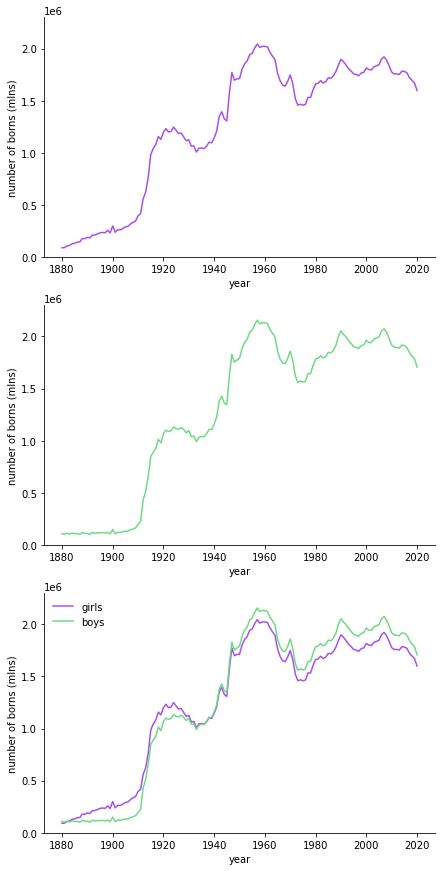

In [13]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies_girls = babies[babies.sex == 'F'].groupby('year').number.sum()
babies_boys = babies[babies.sex == 'M'].groupby('year').number.sum()

fig, ax = plt.subplots(3, figsize = (7,15))
ax[0].plot(babies_girls, c='#a84eed')
ax[0].set_xlabel('Birth trend, girls')
ax[1].plot(babies_boys, c='#6fd984')
ax[1].set_xlabel('Birth trend, boys')
ax[2].plot(babies_girls, c='#a84eed')
ax[2].plot(babies_boys, c='#6fd984')
ax[2].set_xlabel('Birth trends, girls & boys')
ax[2].legend(['girls', 'boys'], frameon=False)
    
for axis in ax.ravel():
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.set_xlabel('year')
    axis.set_ylabel('number of borns (mlns)')
    axis.set_ylim(0, 2.30e+06)
    

Судя по графику можно наблюдать следующее: несмотря на то, что до ~1935г. девочки незначительно рождались чаще, а мальчики - с 1935 по 2020 гг., в целом тренды более-менее идентичны и повторяют друг друга, что свидетельствует об относительном равенстве вероятности рождения девочки или мальчика.

## Задание 4 (2.5 балла)

Каждый пункт 0.5 балла

1. В оригинальном датафрейме `babies` создайте новую колонку - первая буква имени `first_letter`. Сделайте это с помощью `.apply()` и анонимной функции.
2. Выберете год из датасета. Сгруппируйте датасет так, чтобы его индексом были первые буквы, а колонкой - количество детей, рожденных в этот год, с именами, начинающимися на эти буквы. Сохраните два новых объекта PadasSeries для 1880 и 2020 года (например, `babies_first_1880`).
3. Создайте рисунок `matplotlib` с 2 графиками один под другим. Добавьте параметр `figsize=(7, 10)`. Постройте столбчатую диаграмму для каждого года в отдельном графике.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. В новой ячейке markdown под графиками кратко опишите как изменились тренды в именах, если смотреть на первые буквы.

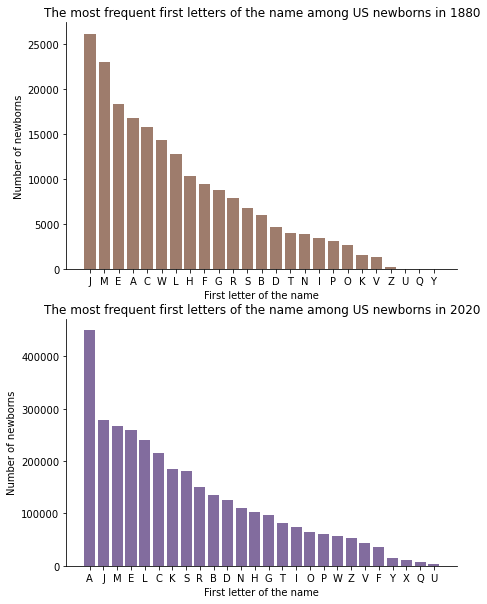

In [14]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

babies['first_letter'] = babies.name.apply(lambda x: x[0])
# babies['first_letter'] = babies.name.str[0] - просто еще один вариант сделать такую же работу


babies_first_1880 = babies[babies.year == 1880].groupby('first_letter').number.sum().sort_values(ascending = False)
babies_first_2020 = babies[babies.year == 2020].groupby('first_letter').number.sum().sort_values(ascending = False)

fig, ax = plt.subplots(2, figsize = (7,10))
ax[0].bar(babies_first_1880.index, babies_first_1880, color='#9e7c6c')
ax[1].bar(babies_first_2020.index, babies_first_2020, color='#826c9e')
ax[0].set_title('The most frequent first letters of the name among US newborns in 1880')
ax[1].set_title('The most frequent first letters of the name among US newborns in 2020')

for axis in ax.ravel():
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.set_ylabel('Number of newborns')
    axis.set_xlabel('First letter of the name')

Попробуем сравнить тренды в именах с помощью обзора топ-10 первых букв в именах. Из наиболее популярных 10 первых буквах имен 1880 года в 2020 году остались 5 из 10 имен (J, M, E, A, C, L), и это еще не говоря о том, что сами места в топе-10 букв поменялись между собой. 

Больше того, само распределение стало более монополизированным буквой А, преимущество которой более существенно наблюдается в сравнении с лидировавшей в 1880 году буквой J. 

## Задание 5 (4 балла)

Каждый пункт 0.8 балла

1. Создайте пустой список `popular_names`. Найдите самые полулярные женские и мужские имена в 1880 году и 2020 году (всего 4 имени) и добавьте из в список `popular_names`. Будет здорово, если вы придумаете как это сделать в цикле или с помощью функций, но можно и просто найти четыре имени и добавить их в список. Главное правило — имена не должны быть вписаны в список вручную. В итоге у вас должен получиться список с четыремя строками.
2. Создайте рисунок matplotlib с одним горизонтальным графиком, размер установите (10, 5). В одной оси координат постройте линейный графики для каждого популярного за все время (это можно сделать в цикле со списком `popular_names`). На каждом шаге цикла сгруппируйте отфильтрованный датасет для этого имени по году и найдите общее количество новорожденных. Постройте график для этих данных в ось координат.
3. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны, у графиков должна быть легенда (передайте методу `.legend()` `popular_names` в качестве параметра. Для каждого из графиков выберите нестандартный цвет в палитре hex-color.
4. Адаптируйте и добавьте код к вашему графику, чтобы каждые 20 лет начиная с 1880-го года по 2020-й были отмечены тонкой серой линией (тут вам поможет range() c шагом.

```
for year in [1880, 1890]:
    ax.axvline(x=year, color='blue', lw=0.25)
```
5. В новой ячейке markdown под графиками кратко опишите как тренды четырех имен.

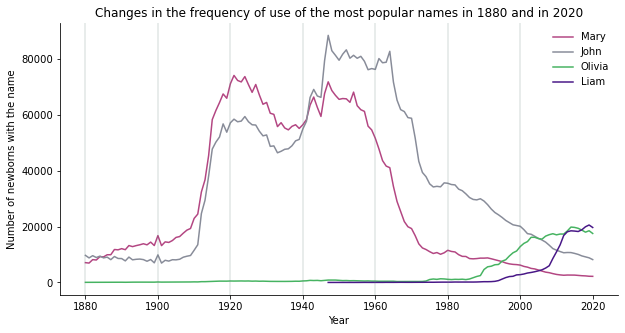

In [15]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。



popular_names = []
for year in [1880, 2020]:
    for sex in ['F', 'M']:
        popular_names.append(babies[(babies.year == year) & (babies.number == babies[(babies.year == year) & (babies.sex == sex)].groupby('name').number.sum().max())].name.item())
        
fig, ax = plt.subplots(1, figsize = (10,5))


for name, color in dict({popular_names[0]:'#b34682', popular_names[1]:'#888c99', popular_names[2]:'#46b361', popular_names[3]:'#481787'}).items():
    ax.plot(babies[babies.name == name].groupby('year').number.sum(), color=color)
        
ax.set_ylabel('Number of newborns with the name')
ax.set_xlabel('Year')
ax.legend(popular_names, frameon = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Changes in the frequency of use of the most popular names in 1880 and in 2020')

for tick in range(1880, 2020, 20):
    ax.axvline(x=tick, color='#68827d', lw=0.3)

Как видно из графика, самые популярные имена из 1880 года в виде Мэри и Джона в дальнейшем получили еще большее распространение в абсолютных цифрах - ~1920 и ~1950 стали для них пиковыми
Начиная с 1965 года тренд популярности этих имен пошел на значительный спад, вследствие чего с 2010 года такими именами называют не более 20 тыс. новорожденных в год каждого пола.

Что касается наиболее популярных ныне имен в США, то Оливия долгое время было очень малораспространенным именем, в то время как Лиам начали фиксировать лишь с 1940-х годов.
Имя Оливия начало активно получать популярность с 1990-х годов, а Лиам - с 2000-х.

Больше того, в 2020 году самой популярной парой имен в 2020 году называют в совокупности лишь около 40 тыс. новорожденных, в то время как в лучшие свои годы именами Мэри и Джон именовались в общей сумме около 160 тыс. новорожденных в год. Такие данные, соответственно, свидетельствуют о возврате к тренду разнообразия имен, который существовал примерно до 1910-х годов. 